In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(1)

In [2]:
keywords = pd.read_csv('keywords_preprocessed.csv')
meta = pd.read_csv('movies_metadata_preprocessed.csv')
ratings = pd.read_csv('ratings_preprocessed.csv')

In [3]:
#random_state in the train test split has been set to 1 to recreate results, remove it to review model
df_numeric = meta[['budget','popularity','revenue','runtime','vote_average','vote_count']]
df_numeric.dropna(inplace=True)
#new feature "new" has been engineered to be able to use the votes provided by viewers while trying to 
#give importance to number of voters
df_numeric['new'] = df_numeric['vote_average']*np.power(df_numeric['vote_count'],0.8)
train,test = train_test_split(df_numeric,test_size=0.25,random_state = 1)

/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
x = train.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = df_numeric.columns

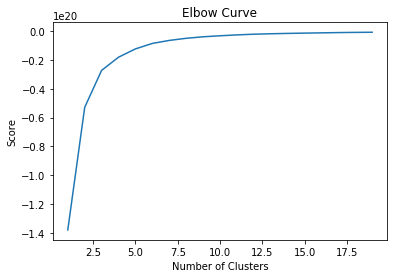

In [5]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
y = np.array(train.revenue).reshape(-1,1)
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
#we look at the graph and not that elbow is at 4 and hence we choose 4 as
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit(y).predict(y)
train['cluster'] = kmeans.labels_


/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
print('Size of clusters : ',[len(train[train.cluster==i]) for i in range(4)])

Size of clusters :  [31385, 76, 300, 1239]


In [8]:
train.groupby(['cluster']).mean()

,budget,popularity,revenue,runtime,vote_average,vote_count,new
cluster,,,,,,,
0,5.433583e+06,2.462828,9.070498e+06,93.622973,5.605420,46.572790,107.434876
1,1.611053e+08,50.213540,9.394031e+08,132.342105,6.976316,5564.539474,6951.011006
2,9.145519e+07,16.546148,3.782648e+08,117.406667,6.589000,2492.423333,3413.449875
3,4.343639e+07,10.928952,1.237780e+08,120.012914,6.324455,881.298628,1380.723773


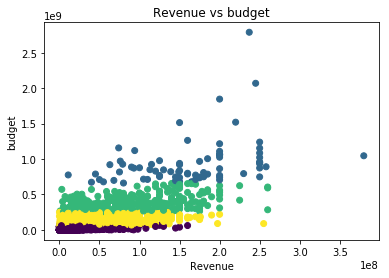

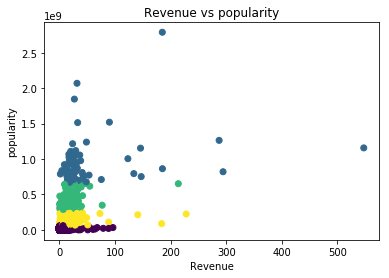

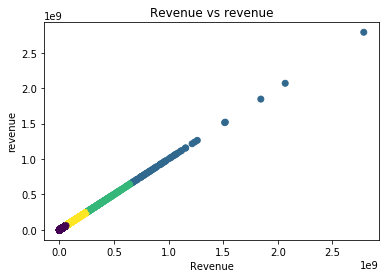

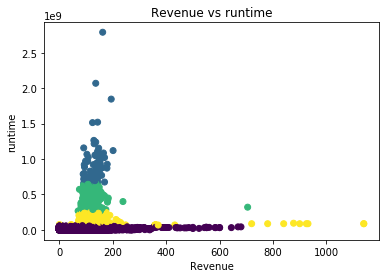

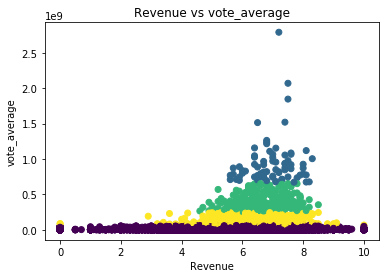

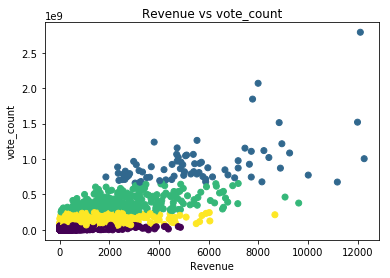

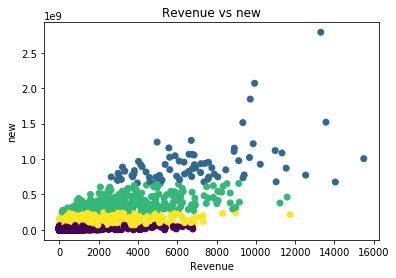

In [9]:
size_array = list(train.groupby(['cluster']).count()['revenue'].values)
train[train['cluster']==size_array.index(sorted(size_array)[0])].revenue.mean()
for i in train.iloc[:,:-1]:
    plt.scatter(train[i],train['revenue'],c=kmeans.labels_)
    plt.xlabel("Revenue")
    plt.ylabel(i)
    plt.title('Revenue vs '+i)
    plt.show()

In [10]:
cluster1 = train[train.cluster==0]
cluster1 = cluster1[cluster1.revenue!=0]
print('Size of cluster 1: ',len(cluster1))

Size of cluster 1:  31385


In [11]:
#we can observe clusters in the train and test dataset
test_clusters = kmeans.predict(test.revenue.values.reshape(-1,1))
test['cluster'] = test_clusters
print(train.groupby(['cluster']).mean())
print(test.groupby(['cluster']).mean())

               budget  popularity       revenue     runtime  vote_average  \
cluster                                                                     
0        5.433583e+06    2.462828  9.070498e+06   93.622973      5.605420   
1        1.611053e+08   50.213540  9.394031e+08  132.342105      6.976316   
2        9.145519e+07   16.546148  3.782648e+08  117.406667      6.589000   
3        4.343639e+07   10.928952  1.237780e+08  120.012914      6.324455   

          vote_count          new  
cluster                            
0          46.572790   107.434876  
1        5564.539474  6951.011006  
2        2492.423333  3413.449875  
3         881.298628  1380.723773  
               budget  popularity       revenue     runtime  vote_average  \
cluster                                                                     
0        5.520525e+06    2.426209  9.072064e+06   94.468085      5.625818   
1        1.611207e+08   26.983383  9.305625e+08  126.137931      6.975862   
2        9.53

/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 34250782.29824559
r_squared value: 0.7193503114352452


/Users/rahulshiv/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
/Users/rahulshiv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


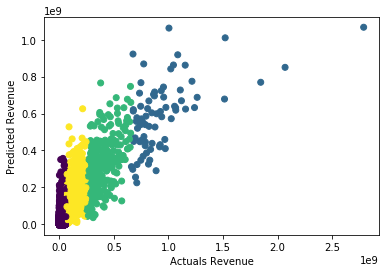

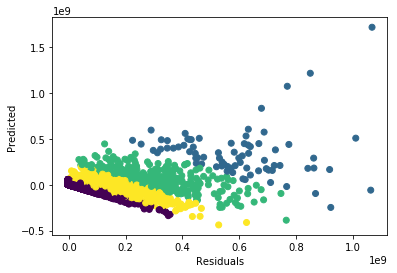

In [12]:
#Linear regression done on selected attributes
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X = train[['budget','popularity','new']]
y = train[['revenue']]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
pred = pd.DataFrame(predictions,columns=["revenue"])
y['revenue_pred'] = predictions

print('RMSE:',(mean_squared_error(y.revenue,y.revenue_pred))**0.5)
print('r_squared value:',model.score(X,y.revenue))

residuals = y.revenue - y.revenue_pred
plt.scatter(y.revenue,y.revenue_pred,c=kmeans.labels_)
plt.xlabel("Actuals Revenue")
plt.ylabel("Predicted Revenue")
plt.show()
plt.scatter(y.revenue_pred,residuals,c=kmeans.labels_)
plt.xlabel("Residuals")
plt.ylabel("Predicted")
plt.show()

